In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [4]:
fashion_mnist= keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandel',
              'Shirt','Sneaker','Bag','Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

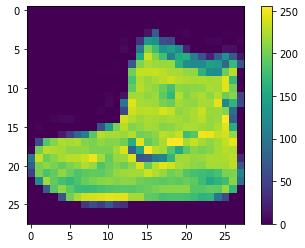

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

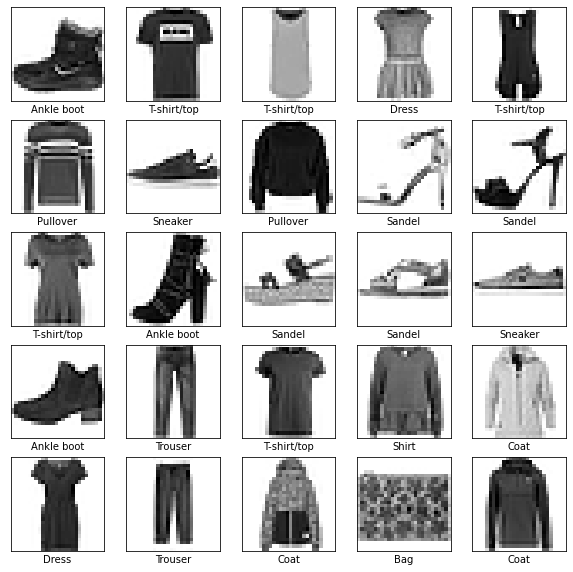

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap= plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ERROR! Session/line number was not unique in database. History logging moved to new session 85


In [20]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2788 - accuracy: 0.8967
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2677 - accuracy: 0.9014
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2583 - accuracy: 0.9040
Epoch 4/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2476 - accuracy: 0.9069
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2381 - accuracy: 0.9110
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2304 - accuracy: 0.9137
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2229 - accuracy: 0.9179
Epoch 8/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2160 - accuracy: 0.9180
Epoch 9/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2099 - accuracy: 0.9221
Epoch 10/10
60

In [21]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print('Test accuracy',test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3338 - accuracy: 0.8892s - loss: 0.3472 - accuracy: 
Test accuracy 0.8892


In [27]:
predictions= model.predict(test_images)

ERROR! Session/line number was not unique in database. History logging moved to new session 91


In [28]:
predictions[0]

array([9.3332751e-11, 8.7149636e-15, 2.0311721e-15, 2.4070762e-15,
       9.9660650e-14, 7.2611222e-04, 3.2635628e-12, 4.1135287e-04,
       2.6071117e-11, 9.9886250e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [34]:
def plot_image(i,predictions_array, true_label, img):
    predictions_array,true_label,img= predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap= plt.cm.binary)
    
    predicted_label= np.argmax(predictions_array)
    if predicted_label== true_label:
        color= 'blue'
    else:
        color= 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label= predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label= np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

ERROR! Session/line number was not unique in database. History logging moved to new session 96


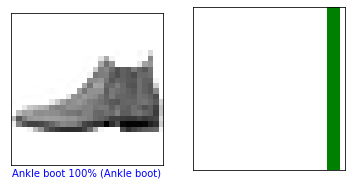

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

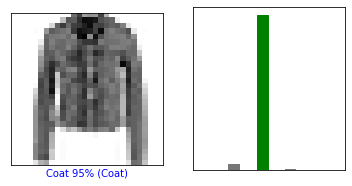

In [38]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 97


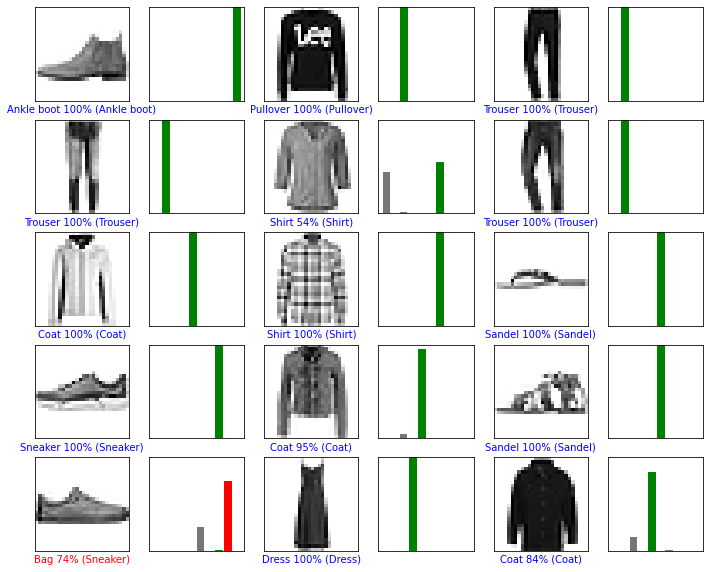

In [39]:
num_rows= 5
num_cols= 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows,2*num_cols, 2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

In [40]:
img= test_images[0]
print(img.shape)

(28, 28)


In [41]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [42]:
predictions_single= model.predict(img)

print(predictions_single)

[[9.3333286e-11 8.7150297e-15 2.0311875e-15 2.4070946e-15 9.9661219e-14
  7.2611222e-04 3.2635691e-12 4.1135403e-04 2.6071117e-11 9.9886250e-01]]


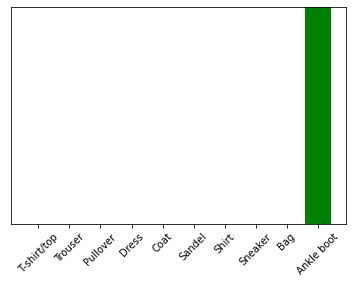

In [45]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [46]:
np.argmax(predictions_single[0])

9